In [1]:
# TODO: 1. 랜덤 입력 값 작성(배치 1, 32x32, 채널 3)
# TODO: 2. Conv2D, MaxPool2D, Dense 파라미터 LeNet-5 모델에 맞게
# TODO: 3. 하나 돌리고 shaphe 출력하면서 흐름 파악
# 심화1) keras.datasets에서 제공하는 mnist 적용
# 심화2) 옵티마이저와 로스 설정하여 실제 모델 학습
# 심화3) 학습한 모델 성능 확인하기 위해 evaluate
# 심화4) 정확도 및 loss 그래프로 나타내기

![image](https://user-images.githubusercontent.com/47033052/109135835-db216580-779a-11eb-9e8f-7db4fef02fe5.png)


In [1]:
# prefix
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# mnist
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
rows, cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows, cols, 1)

In [4]:
# 정규화
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# one-hot 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [23]:
def build_lenet(input_shape):
    # 컨볼루션
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=6,
                                    kernel_size=(5,5),
                                    strides=(1,1),
                                    activation='tanh',
                                    input_shape=input_shape))

    # SupSampling
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                              strides=(2,2)))

    # 컨볼루션
    model.add(tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5,5),
                                    strides=(1,1),
                                    activation='tanh'))

    # SupSampling
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                              strides=(2,2)))

    # 펼치기
    model.add(tf.keras.layers.Flatten())

    # dense
    model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

    # 펼치기
    model.add(tf.keras.layers.Flatten())

    # dense
    model.add(tf.keras.layers.Dense(units=84, activation='tanh'))     

    # output layer
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1, 
                                                                                     momentum=0.0, 
                                                                                     decay=0.0),
                 metrics=['accuracy'])
    
    return model

In [24]:
lenet = build_lenet(input_shape)

In [25]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)              

In [26]:
hist = lenet.fit(x_train, y_train, batch_size=256, epochs=10, verbose=1)

Epoch 1/10
235/235 [==============================] - 7s 27ms/step - loss: 0.9540 - accuracy: 0.7407
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.2692 - accuracy: 0.9234
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1886 - accuracy: 0.9458
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1452 - accuracy: 0.9583
Epoch 5/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1139 - accuracy: 0.9674
Epoch 6/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0947 - accuracy: 0.9727
Epoch 7/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0803 - accuracy: 0.9762
Epoch 8/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0693 - accuracy: 0.9796
Epoch 9/10
235/235 [==============================] - 6s 28ms/step - loss: 0.0659 - accuracy: 0.9797
Epoch 10/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0632 - accura

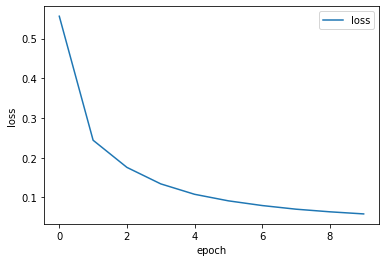

In [27]:
# loss 그래프 그리기
plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'])
plt.show()

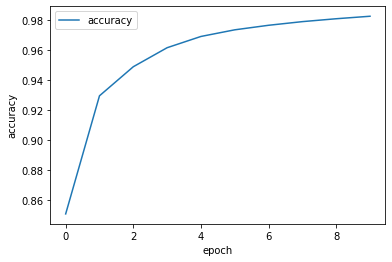

In [28]:
# 정확도 그래프 그리기
plt.plot(hist.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.show()